In [1]:
# import Pkg; Pkg.add(url="https://github.com/Red-Portal/SteinDiscrepancy.jl.git")
using Random, Distributions, RData

In [2]:
# import the kernel stein discrepancy function and kernel to use
using SteinDiscrepancy: SteinInverseMultiquadricKernel, ksd
# create the kernel instance
kernel = SteinInverseMultiquadricKernel()

┌ Info: Precompiling SteinDiscrepancy [47571ba0-6b7d-4e5f-b5d0-9456c75a042d]
└ @ Base loading.jl:1342
┌ Warning: Package SteinDiscrepancy does not have LinearAlgebra in its dependencies:
│ - If you have SteinDiscrepancy checked out for development and have
│   added LinearAlgebra as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with SteinDiscrepancy
└ Loading LinearAlgebra into SteinDiscrepancy from project dependency, future warnings for SteinDiscrepancy are suppressed.


SteinInverseMultiquadricKernel(0.5, 1.0)

In [3]:
# # import the kernel stein discrepancy function and kernel to use
# using SteinDiscrepancy: SteinInverseMultiquadricKernel, ksd
# # create the kernel instance
# kernel = SteinInverseMultiquadricKernel()
# # compute the KSD2
# result = ksd(points=samples, gradlogdensity=gradlogp, kernel=kernel)
# # get the final ksd
# kernel_stein_discrepancy = sqrt(result.discrepancy2)

In [29]:
rwmh_data = load("/Users/niloybiswas/Google Drive/My Drive/Niloy_Files/github/BackUpFiles/CoupledHalfT_old/examples/big_data_examples/stein_rwmh_chain_data.RData");
samples = rwmh_data["all_chains"];
nchains = size(samples)[1];
chain_length = size(samples)[2];

In [30]:
# define the grad log density of standard normal target
function gradlogp(x::Vector{Float64})
    -x
end

gradlogp (generic function with 1 method)

In [43]:
# Check if E[gradlogp(X_t)] close to zero for large t
t=2

grads = zeros((nchains, (1)))
for i in [1:1:nchains;]
    grads[i,:] = gradlogp(samples[:,t][i,:]);
end

mean(grads, dims=1), var(grads, dims=1)

([-9.800919087423683], [0.08744216894183973])

In [47]:
ksd_over_time = zeros(chain_length)

for t in [1:1:chain_length;]
    # compute the KSD2
    result = ksd(points=samples[:,t], gradlogdensity=gradlogp, kernel=kernel)
    # get the final ksd
    kernel_stein_discrepancy = sqrt(result.discrepancy2);
    ksd_over_time[t] = kernel_stein_discrepancy;
    print(t)
end




123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300

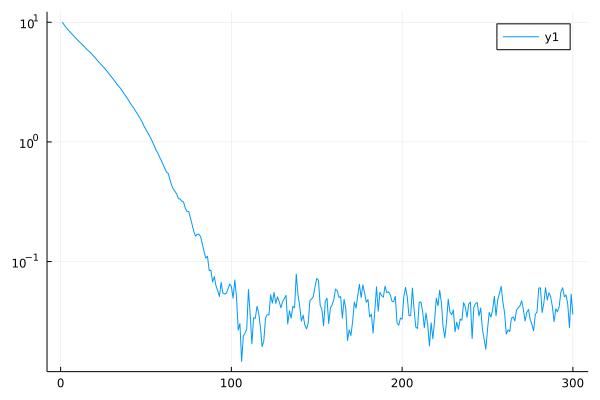

In [50]:
using Plots
plot([1:1:chain_length;], ksd_over_time[1:chain_length], yaxis=:log)